In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# flowers_root = tf.keras.utils.get_file(
#     'flower_photos',
#     'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
#     untar=True) # or http://colab.class.vision/flower_photos.tgz
flowers_root = "D:/dataset/flower_photos" 

In [4]:
list_ds = tf.data.Dataset.list_files(str(flowers_root+'*/*'))

In [7]:
# Reads an image from a file, decodes it into a dense tensor, and resizes it
# to a fixed shape.
def parse_image(filename):
    parts = tf.strings.split(filename, '\\') # or replace \\ with / in linux
    label = parts[-2]

    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, [128, 128])
    return image, label

In [13]:
flowers_root = "D:/dataset/flower_photos"
list_ds = tf.data.Dataset.list_files(str(flowers_root+'*/*'))
labeled_ds = list_ds.map(parse_image)
batched_ds = labeled_ds.batch(32)
for image, label in batched_ds.take(3):
    print(image.shape)    


(32, 128, 128, 3)
(32, 128, 128, 3)
(32, 128, 128, 3)


In [11]:
def show(image, label):
    plt.figure()
    plt.imshow(image)
    plt.title(label.numpy().decode('utf-8'))
    plt.axis('off')

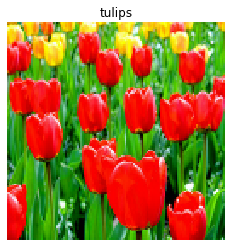

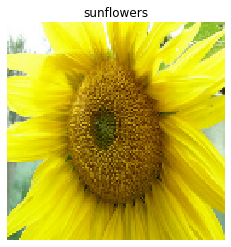

In [12]:
images_ds = list_ds.map(parse_image)

for image, label in images_ds.take(2):
    show(image, label)


## RANDOM RORATE WITH py_function()

In [21]:
import scipy.ndimage as ndimage
import numpy as np

def random_rotate_image(image):
    image = ndimage.rotate(image, np.random.uniform(-30, 30), reshape=False)
    return image

In [22]:
def tf_random_rotate_image(image, label):
    [image,] = tf.py_function(random_rotate_image, [image], [tf.float32])
    return image, label

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


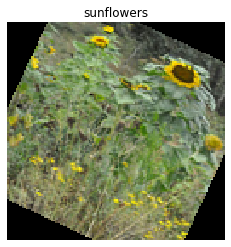

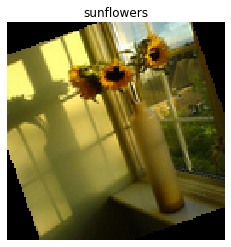

In [27]:
rot_ds = images_ds.map(tf_random_rotate_image)

for image, label in rot_ds.take(2):
    show(image, label)
